# [RQ2] Let’s finally dig into this vast dataset, retrieving some vital information:

## RQ 2.1

### Plot the number of books for each author in descending order.

Taking only the first 400 authors in the plot because otherwise the graph
becomes too dense and returns errors

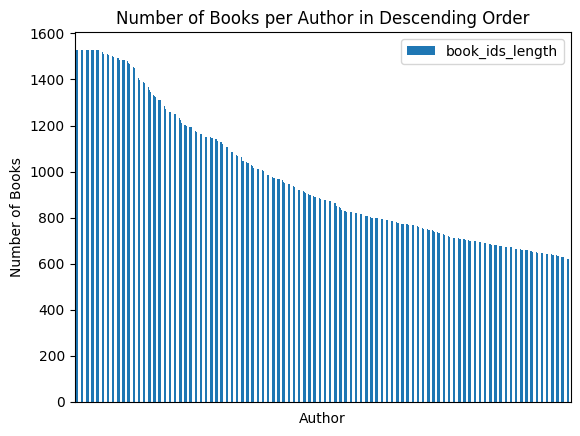

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

chunk_size = 100000
dfs = []

with open("lighter_authors.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk[["name", "book_ids"]]
        dfs.append(chunk)

df = pd.concat(dfs, ignore_index=True)

# Calculates, for each author, the number of books they wrote
df["book_ids_length"] = df["book_ids"].apply(lambda x: len(x))

# Sorts the first 1000 authors by number of books they wrote
books_count_by_author = df.sort_values(by="book_ids_length", ascending=False).head(400)

# Plots the data as requested
books_count_by_author.plot(kind="bar")
plt.title("Number of Books per Author in Descending Order")
plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.xticks([])

plt.show()

## RQ 2.2

### Which book has the highest number of reviews?

To find the book with the highest number of reviews i'll just use the integrated
functions and then locate the book with that number of reviews

In [11]:
import pandas as pd

chunk_size = 100000
dfs = []

with open("lighter_books.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk[["title", "text_reviews_count"]]
        dfs.append(chunk)

df = pd.concat(dfs, ignore_index=True)

# Finding the book with the highest number of reviews
idx_max_reviews_book = df["text_reviews_count"].idxmax()
# Locating the book within the dataframe
max_reviews_book = df.loc[idx_max_reviews_book]

print(max_reviews_book)


title                 Harry Potter and the Sorcerer's Stone (Harry P...
text_reviews_count                                               116930
Name: 1, dtype: object


## RQ 2.3

### Which are the top ten and ten worst books concerning the average score?

Loading the dataset and sorting it by avarage rating of the books to find the 10
with the highest score and the 10 with the lowest score

In [13]:
import pandas as pd

chunk_size = 100000
dfs = []

with open("lighter_books.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk[["title", "average_rating"]]
        dfs.append(chunk)

df = pd.concat(dfs, ignore_index=True)
# Cleaning the dataset
df = df[df["average_rating"] > 0]

# Sorting by average rating and taking only the first 10 values to find the
# 10 books with the highest score and the 10 with the lowest score
top_10_best_books = df.sort_values(by="average_rating", ascending=False).head(10)
top_10_worst_books = df.sort_values(by="average_rating", ascending=True).head(10)

print("Top 10 best books :\n", top_10_best_books)
print("\nTop 10 worst books :\n", top_10_worst_books)


Top 10 best books :
                                                    title  average_rating
42473                       Star Wars Adventure in ABC's             5.0
84411                                 Lewis Grizzard Mix             5.0
72228                                 Adventurous Bowman             5.0
72229                                 Adventurous Bowmen             5.0
55652  Favorite Children's Authors and Illustrators, ...             5.0
63027  Anouilh Plays: 2: The Rehearsal, Becket, The O...             5.0
72262  A Devotional Guide to John: The Gospel of Eter...             5.0
72295                           You Are What You Believe             5.0
72297                            For God's Sake Be Human             5.0
38065                                      Obra Completa             5.0

Top 10 worst books :
                                                    title  average_rating
90921                                   Evelyn's Husband             1.0
28097  

## RQ 2.4

### Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

To find the distribution of languages within the dataset I used the integrated function value_counts()
that counts the occurrences for each language in the lighter_books dataset and then the values are
plotted in a proper chart, as requested

language
eng      32420
en-US     3870
spa       3161
ger       1537
fre       1383
en-GB     1045
por        213
per        204
ita        188
rus        112
jpn        112
mul         61
zho         43
nl          38
swe         35
tur         30
ara         29
grc         26
pol         24
heb         22
cat         21
en-CA       16
kor         15
lat         14
hun         13
nor         11
glg          9
ind          9
enm          8
dan          7
gre          7
isl          6
pes          5
fin          4
urd          4
rum          3
sco          3
afr          3
cze          3
wel          3
bul          3
msa          2
srp          2
lit          2
scr          1
tlh          1
mun          1
gla          1
mar          1
kan          1
nno          1
frs          1
ale          1
gle          1
vie          1
ira          1
epo          1
ang          1
--           1
myn          1
Name: count, dtype: int64


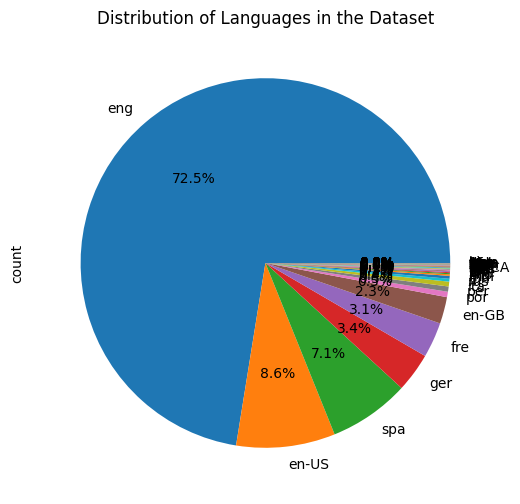

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

chunk_size = 100000
dfs = []

with open("lighter_books.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk[["language"]]
        dfs.append(chunk)

df = pd.concat(dfs, ignore_index=True)
# Cleaning the dataset
df = df[df["language"] != ""]

# Counts the occurences for each language to show them in a proper graph
language_counts = df["language"].value_counts()

print(language_counts)

# Plotting the data in a suitable graph as requested
plt.figure(figsize=(10, 6))
language_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Languages in the Dataset")
plt.show()


## RQ 2.5

### How many books have more than 250 pages?

To calculate how many books have more than 250 pages we loaded all the books, cleaned and formatted the
dataset to calculate the num_pages as an int and to not have missing values and then created a dataset
with only the books with more than 250 pages and printed the length of this last dataset.

In [18]:
import pandas as pd

chunk_size = 100000
dfs = []

with open("lighter_books.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk[["num_pages"]]
        dfs.append(chunk)

df = pd.concat(dfs, ignore_index=True)


# Function to convert num_pages values to int and to turn to 0 the books with missing number of pages
def convert_int(value):
    try:
        return int(value)
    except (ValueError, TypeError):
        return 0


df.loc[:, "num_pages"] = df["num_pages"].apply(convert_int)

# Creating a dataset with only the books with more than 250 pages and calculating the length of it to know
# how many books in the dataset have more than 250 pages
books_more_than_250_pages = df.loc[df["num_pages"] > 250]
count_books_more_than_250_pages = len(books_more_than_250_pages)

print("The number of books with more than 250 pages is: " , count_books_more_than_250_pages)


The number of books with more than 250 pages is:  41504


## RQ 2.6

### Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).

To plot the distribution of fans for the top 50 authors who have written more books we'll first calculate the number 
of books written by each author, then sort them by the number of books written and extract the first 50. Lastly, I'll
plot them as requested.

                          name  \
3201               Enid Blyton   
3114                  Stan Lee   
4760              Isaac Asimov   
4053               Peter David   
23792          Agatha Christie   
34039        Charles M. Schulz   
1630                 Mark Waid   
4360           Chris Claremont   
3659      Brian Michael Bendis   
7646               Chuck Dixon   
4353                John Byrne   
13203                Jim Davis   
3073                Roy Thomas   
1017              Stephen King   
498               Ray Bradbury   
729         Arthur Conan Doyle   
1310         Robert Silverberg   
2863            H.P. Lovecraft   
24435              Leo Tolstoy   
3111                Jack Kirby   
3660            Robert Kirkman   
15338         Robert E. Howard   
76704   Robert Louis Stevenson   
319        William Shakespeare   
4336               Garth Ennis   
2107           Rudyard Kipling   
1579               Franz Kafka   
952               Roger Priddy   
1002          

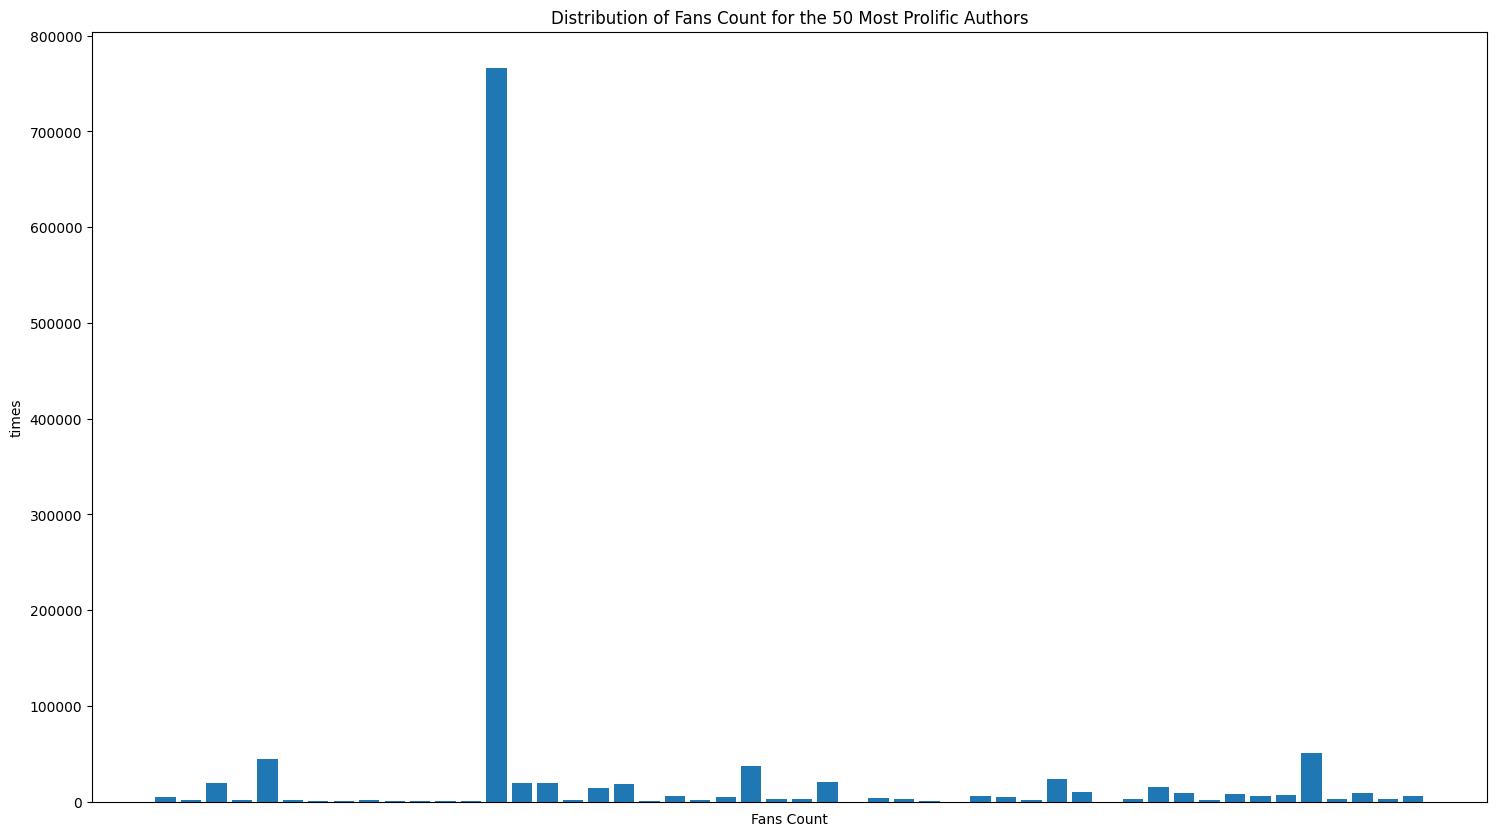

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

chunk_size = 100000
dfs = []

with open("lighter_authors.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk[["name", "book_ids", "fans_count"]]
        dfs.append(chunk)
        break

df = pd.concat(dfs, ignore_index=True)

# Calculating the number of books written by each author as done in RQ 2.1
df["book_ids_length"] = df["book_ids"].apply(lambda x: len(x))

# Sorting the authors by the number of books written Extracting the first 50
top_50_authors = df.sort_values(by="book_ids_length", ascending=False).head(50)

print(top_50_authors)

# Plotting them as requested
plt.figure(figsize=(18, 10))
plt.bar(top_50_authors["name"], top_50_authors["fans_count"])
plt.title("Distribution of Fans Count for the 50 Most Prolific Authors")
plt.xlabel("Fans Count")
plt.ylabel("times")
plt.xticks([])

plt.show()


# [RQ7] Estimating probabilities is a core skill for a data scientist: show us your best!

## RQ 7.1

### Estimate the probability that a book has over 30% of the ratings above 4.

To estimate the probability that a book has over 30% of the ratings above 4 we'll extract the 4 and 5 star ratings from
each book and sum them and compare them sum to the total rating. In this way we'll know if a book has more than 30% of
the ratings above 4. To calculate the probability of picking a book has over 30% of the ratings above 4 we'll compare the
number of books with this property to the total books.

In [21]:
import pandas as pd
import re

chunk_size = 100000
dfs = []

# Function to extract the number of 4 and 5-star ratings from the rating distribution
def extract_4_and_5_star_ratings(ratings_string):
    ratings = re.findall(r"[45]:(\d+)", ratings_string)

    if ratings:
        return sum(int(rating) for rating in ratings)
    else:
        return 0


f = pd.read_json("lighter_books.json", lines=True, chunksize=chunk_size)
for chunk in f:
    selected_columns = chunk[["rating_dist", "ratings_count"]].copy()
    selected_columns.loc[:, "4_5_star_ratings"] = selected_columns["rating_dist"].apply(
        extract_4_and_5_star_ratings
    )
    dfs.append(selected_columns)

df = pd.concat(dfs)

# Calculates the percentage of 4 and 5-star ratings out of the total ratings for each book
df.loc[:, "4_5_star_percentage"] = (df["4_5_star_ratings"] / df["ratings_count"]) * 100

# Dataset with only the books with more than 30% of 4 and 5-star ratings out of the total ratings
books_over_30_percent = df[df["4_5_star_percentage"] > 30]

# Calculates and prints the probability of picking a book with 30% of the ratings above 4
probability = len(books_over_30_percent) / len(df) * 100

print(
    "Probability that a book has over 30% of the ratings above 4 star:",
    probability,
)


Probability that a book has over 30% of the ratings above 4 star: 95.6553048487758


## RQ 7.2

### Estimate the probability that an author publishes a new book within two years from its last work.

In [28]:
import pandas as pd

chunk_size = 10000
dfs = []

with open("lighter_books.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk[["title", "author_id","original_publication_date"]]
        dfs.append(chunk)
        break

df = pd.concat(dfs, ignore_index=True)

# Converting the publication date to Date Format to be able to compare dates
df.loc[:, "original_publication_date"] = pd.to_datetime(
    df["original_publication_date"], format="mixed", errors="coerce"
)

# Sorting the Dataframe by the dates to be able to compare it one after another for each author
df = df.sort_values(by=["author_id", "original_publication_date"])

# Deletes duplicated titles in Dataframe because they would have same original pubblication date and it would be a problem
df = df.drop_duplicates(subset=["title"])

# Variables to keep track of current author and previous author
previous_author_id = None
previous_publication_date = None
days_between_publications = []
set_authors = set()

# Now, for each author we'll check the difference in days between the original date of pubblication of subsequent books and if
# it's less than 730 days (two years) the author gets added to the authors that "publish a new book within two years from its last work"
for index, row in df.iterrows():
    current_author_id = row["author_id"]
    current_publication_date = row["original_publication_date"]

    # For each author's work, checks the days difference
    if previous_author_id is not None and current_author_id == previous_author_id:
        if previous_publication_date is not None:
            days_difference = (
                current_publication_date - previous_publication_date
            ).days
            days_between_publications.append(days_difference)

    # If in the end it's less than 2 years it gets added to the set
    if previous_author_id is not None and current_author_id != previous_author_id:
        for value in days_between_publications:
            if value <= 730:
                set_authors.add(current_author_id)
        days_between_publications = []

    previous_author_id = current_author_id
    previous_publication_date = current_publication_date


# Calculating the probability of picking an author that publishes a new book within two years from its last work
probability = len(set_authors) / len(df) * 100

print(
    "Probability of picking an author that publishes a new book within two years from its last work: ",
    probability,
)


Probability of picking an author that publishes a new book within two years from its last work:  8.38455293981213


## RQ 7.3

### In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has more than 700 pages.


In [29]:
import pandas as pd

chunk_size = 100000
dfs = []

with open("list.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk["books"]
        dfs.append(chunk)
        break

df = pd.concat(dfs, ignore_index=True)
dfs = []

with open("lighter_books.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk[["title", "num_pages"]]
        dfs.append(chunk)
        break

df2 = pd.concat(dfs, ignore_index=True)
# Cleaning dataset
df2 = df2[df2["num_pages"] != ""]
df2 = df2.drop_duplicates(subset=["title"])

# Putting all the titles and num_pages of the dataset in a key-value dictionary to use it later
id_num_pages_dict = {}
for index, row in df2.iterrows():
    book_id = row["title"]
    num_pages = row["num_pages"]

    id_num_pages_dict[book_id] = num_pages

book_id_temp = []
book_ids = []

# There are multiple "books" keys in the Worst books dataset so we had to get the "titles" of all the "books" and put them all in a single list
for i in range(0, len(df)):
    book_id_temp = [book["title"] for book in df[i]]
    book_ids.append(book_id_temp)

book_ids = [item for sublist in book_ids for item in sublist]
# Putting them in a set to avoid repetitions
book_ids = set(book_ids)


# Calculating and printing the probability of picking a book included in the Worst Books dataset from the lighter_books Dataset, knowing it has more than 700 pages
worst_books_included_in_dataset_with_more_than_700_pages = []

for book_id in book_ids:
    if book_id in id_num_pages_dict.keys() and id_num_pages_dict.get(book_id) > 700:
        worst_books_included_in_dataset_with_more_than_700_pages.append(book_id)

probability = (
    len(worst_books_included_in_dataset_with_more_than_700_pages) / len(df2)
) * 100

print(
    "Probability of picking a book included in the Worst Books dataset from the lighter_books Dataset, knowing it has more than 700 pages : ",
    probability,
)


Probability of picking a book included in the Worst Books dataset from the lighter_books Dataset, knowing it has more than 700 pages :  2.0082877016427405


## RQ 7.4

### Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.

Events X and Y would be considered indipendent if P(X and Y) would be approximately equal to (P(X)*P(Y)). In this case I modified the code in the previous exercise to calculate also p(X), P(Y) and (P(X)*P(Y)) to get the following results:

P(X) = "probability of picking a book that is included in the Worst Books" = 0.497
P(Y) = "probability of picking a book that has more than 700 pages" = 0.041

(P(X)*P(Y)) = "probability of picking a book from the 'Worst Books' list (P(X)) and the probability of selecting a book with more than 700 pages (P(Y)) indipendently " = 0.0203

P(X and Y) = "probability of picking a book in 'Worst Books' list with over 700 pages" = 0.0200

the result for (P(X)*P(Y)) and P(X and Y) are similar so we can conclude that the events X and Y are indipendent.

In [1]:
import pandas as pd

chunk_size = 100000
dfs = []

# In order to verify if events X and Y would be considered indipendent we modified the code in the previous exercise to calculate
# also P(X), P(Y) and (P(X)*P(Y)). Infact, in the previous exercise we calculated P(X and Y) and this and (P(X)*P(Y))
# would be aproximately equal it would mean that the two events are indipendent.


with open("list.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk["books"]
        dfs.append(chunk)
        break

df = pd.concat(dfs, ignore_index=True)
dfs = []


with open("lighter_books.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk[["title", "num_pages"]]
        dfs.append(chunk)

df2 = pd.concat(dfs, ignore_index=True)
# Cleaning dataset
df2 = df2[df2["num_pages"] != ""]
df2 = df2.drop_duplicates(subset=["title"])

# Putting all the titles and num_pages of the dataset in a key-value dictionary to use it later
id_num_pages_dict = {}
for index, row in df2.iterrows():
    book_id = row["title"]
    num_pages = row["num_pages"]

    id_num_pages_dict[book_id] = num_pages

book_id_temp = []
book_ids = []

# There are multiple "books" keys in the Worst books dataset so we had to get the "titles" of all the "books" and put them all in a single list
for i in range(0, len(df)):
    book_id_temp = [book["title"] for book in df[i]]
    book_ids.append(book_id_temp)

book_ids = [item for sublist in book_ids for item in sublist]
# Putting them in a set to avoid repetitions
book_ids = set(book_ids)

total_books = len(df2)

# Probability of picking a book included in the list.json included in lighter_books.json too
worst_books_in_dataset = []

for book_id in book_ids:
    if book_id in id_num_pages_dict.keys():
        worst_books_in_dataset.append(book_id)

pX = len(worst_books_in_dataset) / total_books

# Probability of picking a book with more than 700 pages
books_with_more_than_700_pages = []

for value in id_num_pages_dict.values():
    if int(value) > 700:
        books_with_more_than_700_pages.append(value)

pY = len(books_with_more_than_700_pages) / total_books

# Probability of picking a book included in the Worst Books dataset from the lighter_books Dataset, knowing it has more than 700 pages
worst_books_included_in_dataset_with_more_than_700_pages = []

for book_id in book_ids:
    if book_id in id_num_pages_dict.keys() and id_num_pages_dict.get(book_id) > 700:
        worst_books_included_in_dataset_with_more_than_700_pages.append(book_id)

pXandY = len(worst_books_included_in_dataset_with_more_than_700_pages) / total_books

# Printing all the Results

print(pX)
print(pY)
print(pX * pY)
print(pXandY)

# as explained in the text above, the results of p(X and Y) and P(X*Y) seem to be approximately similar so the two events are indipendent


0.4970253070889448
0.04103892259878644
0.02039738310726127
0.020082877016427407


# [RQ8] Charts, statistical tests, and analysis methods are splendid tools to illustrate your data-driven decisions to check whether a hypothesis is correct.

## RQ 8.1

### Can you demonstrate that readers usually rate the longest books as the worst?

To demonstrate that readers usually rate the longest books as the worst we'll extract the 1 star ratings of each book
and divide them based on the number of pages, then we'll calculate the mean of it, demonstrating that the low ratings
tend to be higher if the book is longer

C:\Users\nephr\AppData\Local\Temp\ipykernel_34052\3747744999.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = df.groupby("page_range")["1_star_ratings"].mean()


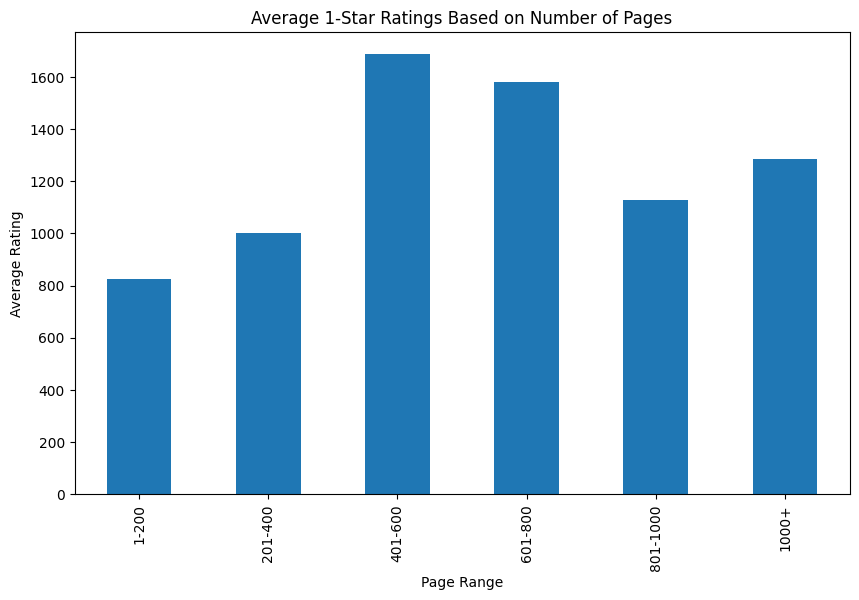

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

chunk_size = 100000
dfs = []

# Function to extract 1-star ratings from each book
def extract_1_star_ratings(ratings_string):
    ratings = re.search(r"[1]:(\d+)", ratings_string)

    if ratings:
        return int(ratings.group(1))
    else:
        return 0


with open("lighter_books.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk[["title", "rating_dist", "num_pages"]]
        chunk.loc[:, "1_star_ratings"] = chunk["rating_dist"].apply(
            extract_1_star_ratings
        )
        dfs.append(chunk)

df = pd.concat(dfs, ignore_index=True)

# Labels for dividing the books in categories based on the number of pages
bins = [0, 200, 400, 600, 800, 1000, float("inf")]
labels = ["1-200", "201-400", "401-600", "601-800", "801-1000", "1000+"]

# Cleaning and formatting data
df = df[df["num_pages"] != ""]
df["num_pages"] = df["num_pages"].astype(int)

# Using pd.cut to assign each book to a category based on the number of pages
df["page_range"] = pd.cut(df["num_pages"], bins=bins, labels=labels, right=False)

# Calculating the average 1-star ratings for each category
average_ratings = df.groupby("page_range")["1_star_ratings"].mean()

# Creating a bar chart with the data obtained
plt.figure(figsize=(10, 6))
average_ratings.plot(kind="bar")
plt.title("Average 1-Star Ratings Based on Number of Pages")
plt.xlabel("Page Range")
plt.ylabel("Average Rating")

plt.show()


## RQ 8.2

### Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?

For this point, we'll first divide them in english and non-english books, then we'll extract all the 1 to 5 star ratings
for each book, and sum it up for each number of star rating and divide it for the total ratings, in this way we'll
be able to see the percentage of each star rating for both english and non-english books and we'll be able to compare them.

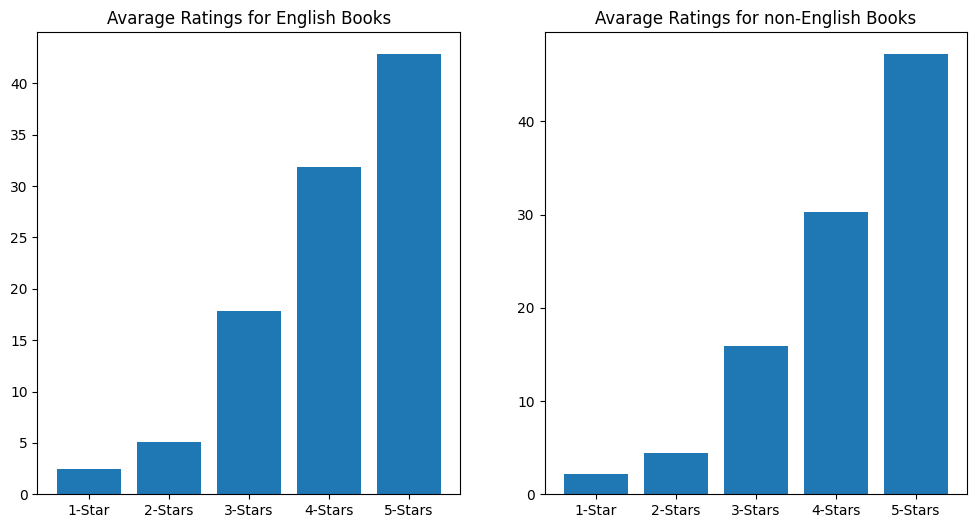

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

chunk_size = 100000
dfs = []

# function to extract 1 to 5 star ratings from the field "rating_dist"
def extract_all_star_ratings(ratings_string):
    ratings = re.findall(r"([1-5]):(\d+)", ratings_string)
    if ratings:
        ratings_dict = {str(rating[0]): int(rating[1]) for rating in ratings}
        return pd.Series(ratings_dict)
    else:
        return pd.Series({"1": 0, "2": 0, "3": 0, "4": 0, "5": 0})


with open("lighter_books.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk[["title", "rating_dist", "ratings_count", "language"]]
        extracted_ratings = chunk["rating_dist"].apply(extract_all_star_ratings)
        chunk = pd.concat([chunk, extracted_ratings], axis=1)
        dfs.append(chunk)

df = pd.concat(dfs, ignore_index=True)
# Cleaning data
df = df[df["language"] != ""]

# Dividing the dataframe in english and non-english books
english_books = df[df["language"] == "eng"]
non_english_books = df[df["language"] != "eng"]

# Summing all the total ratings for each book to get the total ratings to calculate the percentage of each number of star rating
sum_total_ratings_english_books = english_books["ratings_count"].sum()
sum_total_ratings_non_english_books = non_english_books["ratings_count"].sum()

# Calculating the percentage for each number of star rating
english_books_one_star_percentage = (
    english_books["1"].sum() / sum_total_ratings_english_books
) * 100
english_books_two_star_percentage = (
    english_books["2"].sum() / sum_total_ratings_english_books
) * 100
english_books_three_star_percentage = (
    english_books["3"].sum() / sum_total_ratings_english_books
) * 100
english_books_four_star_percentage = (
    english_books["4"].sum() / sum_total_ratings_english_books
) * 100
english_books_five_star_percentage = (
    english_books["5"].sum() / sum_total_ratings_english_books
) * 100

non_english_books_one_star_percentage = (
    non_english_books["1"].sum() / sum_total_ratings_non_english_books
) * 100
non_english_books_two_star_percentage = (
    non_english_books["2"].sum() / sum_total_ratings_non_english_books
) * 100
non_english_books_three_star_percentage = (
    non_english_books["3"].sum() / sum_total_ratings_non_english_books
) * 100
non_english_books_four_star_percentage = (
    non_english_books["4"].sum() / sum_total_ratings_non_english_books
) * 100
non_english_books_five_star_percentage = (
    non_english_books["5"].sum() / sum_total_ratings_non_english_books
) * 100

categories = ["1-Star", "2-Stars", "3-Stars", "4-Stars", "5-Stars"]
y_english = [
    english_books_one_star_percentage,
    english_books_two_star_percentage,
    english_books_three_star_percentage,
    english_books_four_star_percentage,
    english_books_five_star_percentage,
]
y_non_english = [
    non_english_books_one_star_percentage,
    non_english_books_two_star_percentage,
    non_english_books_three_star_percentage,
    non_english_books_four_star_percentage,
    non_english_books_five_star_percentage,
]

# Creating a separate plot in a single image for English and non-English books
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Creating a bar graph for the ratings of English books
axes[0].bar(categories, y_english)
axes[0].set_title("Avarage Ratings for English Books")

# Grafico a barre del secondo set di dati
axes[1].bar(categories, y_non_english)
axes[1].set_title("Avarage Ratings for non-English Books")

plt.show()


## RQ 8.3

### About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.

In this box plot, mean, median, mode and the quantiles play an important role in visualizing
the distribution of data.

The mode is not explicitly visualized, but it's a valuable statistic for understanding the central tendency of the data.
The mean In the box plot can provide information about the center of the data distribution. If the mean is approximately equal to the median, it indicates a symmetric distribution. 
The median In the box plot is shown as an horizontal line inside the box. It represents the middle point of the data.
Lastly, the quantiles divide the data in the box plot into four equal parts. The lower quartile is the 25th percentile, the median is the 50th percentile, and the upper quartile is the 75th percentile. These quartiles help in identifying the spread and skewness of the data.

The combination of these statistics provides a concise summary of a dataset's distribution, central tendency and spread.

[3.946693211043287, 3.96, 4.0, 3.7800000000000002, 3.96, 4.14, 3.918511528678099, 3.94, 4.0, 3.74, 3.94, 4.13]


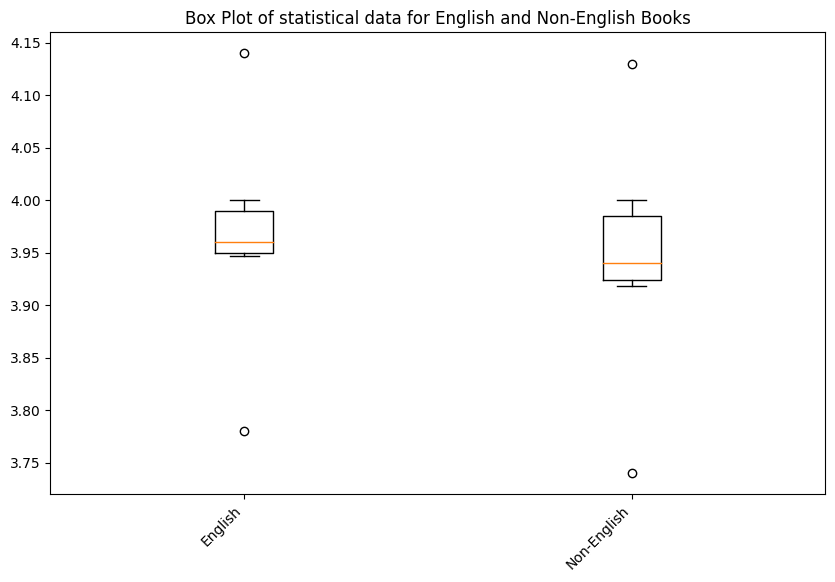

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


chunk_size = 100000
dfs = []

with open("lighter_books.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk[["title", "average_rating", "language"]]
        dfs.append(chunk)

df = pd.concat(dfs, ignore_index=True)
df = df[df["average_rating"] != ""]
df = df[df["average_rating"] != 0]
df = df[df["language"] != ""]

# Dividing the Dataset in english and non-english books
english_books = df[df["language"] == "eng"]
non_english_books = df[df["language"] != "eng"]

# Calculating the average for the total ratings of the books
mean_english_books = english_books["average_rating"].mean()
mean_non_english_books = non_english_books["average_rating"].mean()

# Calculating the median for the total ratings of the books
median_english_books = english_books["average_rating"].median()
median_non_english_books = non_english_books["average_rating"].median()

# Calculating the mode for the total ratings of the books
mode_english_books = english_books["average_rating"].mode().values[0]
mode_non_english_books = non_english_books["average_rating"].mode().values[0]

# Calculating the quantiles for the total ratings of the books
quantile_english_books = english_books["average_rating"].quantile([0.25, 0.5, 0.75])
quantile_non_english_books = non_english_books["average_rating"].quantile(
    [0.25, 0.5, 0.75]
)

# Putting all the values together to show them in the plot
values = [
    mean_english_books,
    median_english_books,
    mode_english_books,
    quantile_english_books[0.25],
    quantile_english_books[0.5],
    quantile_english_books[0.75],
    mean_non_english_books,
    median_non_english_books,
    mode_non_english_books,
    quantile_non_english_books[0.25],
    quantile_non_english_books[0.5],
    quantile_non_english_books[0.75],
]

print(values)

# Creating a box plot for the requested data
plt.figure(figsize=(10, 6))
plt.boxplot([values[:6], values[6:]], labels=["English", "Non-English"])
plt.title("Box Plot of statistical data for English and Non-English Books")
plt.xticks(rotation=45, ha="right")

plt.show()


## RQ 8.4

### It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.

To verify the hypothesis that authors with more fans have more reviews
we'll calculate the statistical correlation. This allows us to see what
correlation exist between two variables


In [5]:
import pandas as pd
from scipy.stats import pearsonr

chunk_size = 100000
dfs = []

with open("lighter_authors.json", "r") as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        chunk = chunk[["fans_count", "text_reviews_count"]]
        dfs.append(chunk)

df = pd.concat(dfs, ignore_index=True)
# Cleaning the dataset
df = df[df["fans_count"] != ""]
df = df[df["fans_count"] > 0]
df = df[df["text_reviews_count"] != ""]
df = df[df["text_reviews_count"] > 0]

# For the statistical correlation we'll calculate the Pearson's correlation coefficient
correlation, _ = pearsonr(df["fans_count"], df["text_reviews_count"])

# If the correlation is positive it will mean that an increase in the number
# of fans is associated with an increase in the number of reviews
# If the correlation is near zero means there is no relationship between the variables
# Instead, if the correlation is negative means that an increase in the number
# of fans is associated with a decrease in the number of reviews

print(correlation)

if correlation > 0:
    print("Positive correlation between fans and reviews")
else:
    print("Negative correlation between fans and reviews")

# In this case the correlation is positive, meaning that when fans_count increases,
# the text_reviews_count tends to increase too, so this verifies that authors with
# more fans tend to have more reviews


0.6773244075023368
Positive correlation between fans and reviews
